In [1]:
import findspark

In [2]:
findspark.init()
findspark.find()

'C:\\Users\\user\\anaconda3\\lib\\site-packages\\pyspark'

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Churn Prediction").getOrCreate()

In [4]:
spark

In [5]:
Telecom_data = ['C:/Users/user/Downloads/Telecom Churn Prediction/churn-bigml-20.csv','C:/Users/user/Downloads/Telecom Churn Prediction/churn-bigml-80.csv']

In [6]:
Telecom_train = spark.read.csv(Telecom_data[1], header='true', inferSchema='true')
Telecom_test = spark.read.csv(Telecom_data[0], header='true', inferSchema='true')
Telecom_train.printSchema()


root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [156]:
print("The telecom train dataset contains {} samples.".format(Telecom_train.count()))
print("The telecom test dataset contains {} samples.".format(Telecom_test.count()))


The telecom train dataset contains 2666 samples.
The telecom test dataset contains 667 samples.


In [157]:
Telecom_train.select("*").toPandas().head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [158]:
n_featur = [t[0] for t in Telecom_train.dtypes if t[1] == 'int' or t[1] == 'double']
print(n_featur)
Telecom_train.describe(n_featur).toPandas().transpose()


['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


,0,1,2,3,4
summary,count,mean,stddev,min,max
Account length,2666,100.62040510127532,39.56397365334985,1,243
Area code,2666,437.43885971492875,42.521018019427174,408,510
Number vmail messages,2666,8.021755438859715,13.61227701829193,0,50
Total day minutes,2666,179.48162040510135,54.21035022086982,0.0,350.8
Total day calls,2666,100.31020255063765,19.988162186059512,0,160
Total day charge,2666,30.512404351087813,9.215732907163497,0.0,59.64
Total eve minutes,2666,200.38615903976006,50.95151511764598,0.0,363.7
Total eve calls,2666,100.02363090772693,20.16144511531889,0,170
Total eve charge,2666,17.033072018004518,4.330864176799864,0.0,30.91


In [159]:
d_spam = Telecom_train.select(n_featur).sample(False, 0.10)
print("The data contain {} samples.".format(d_spam.count()))

The data contain 269 samples.


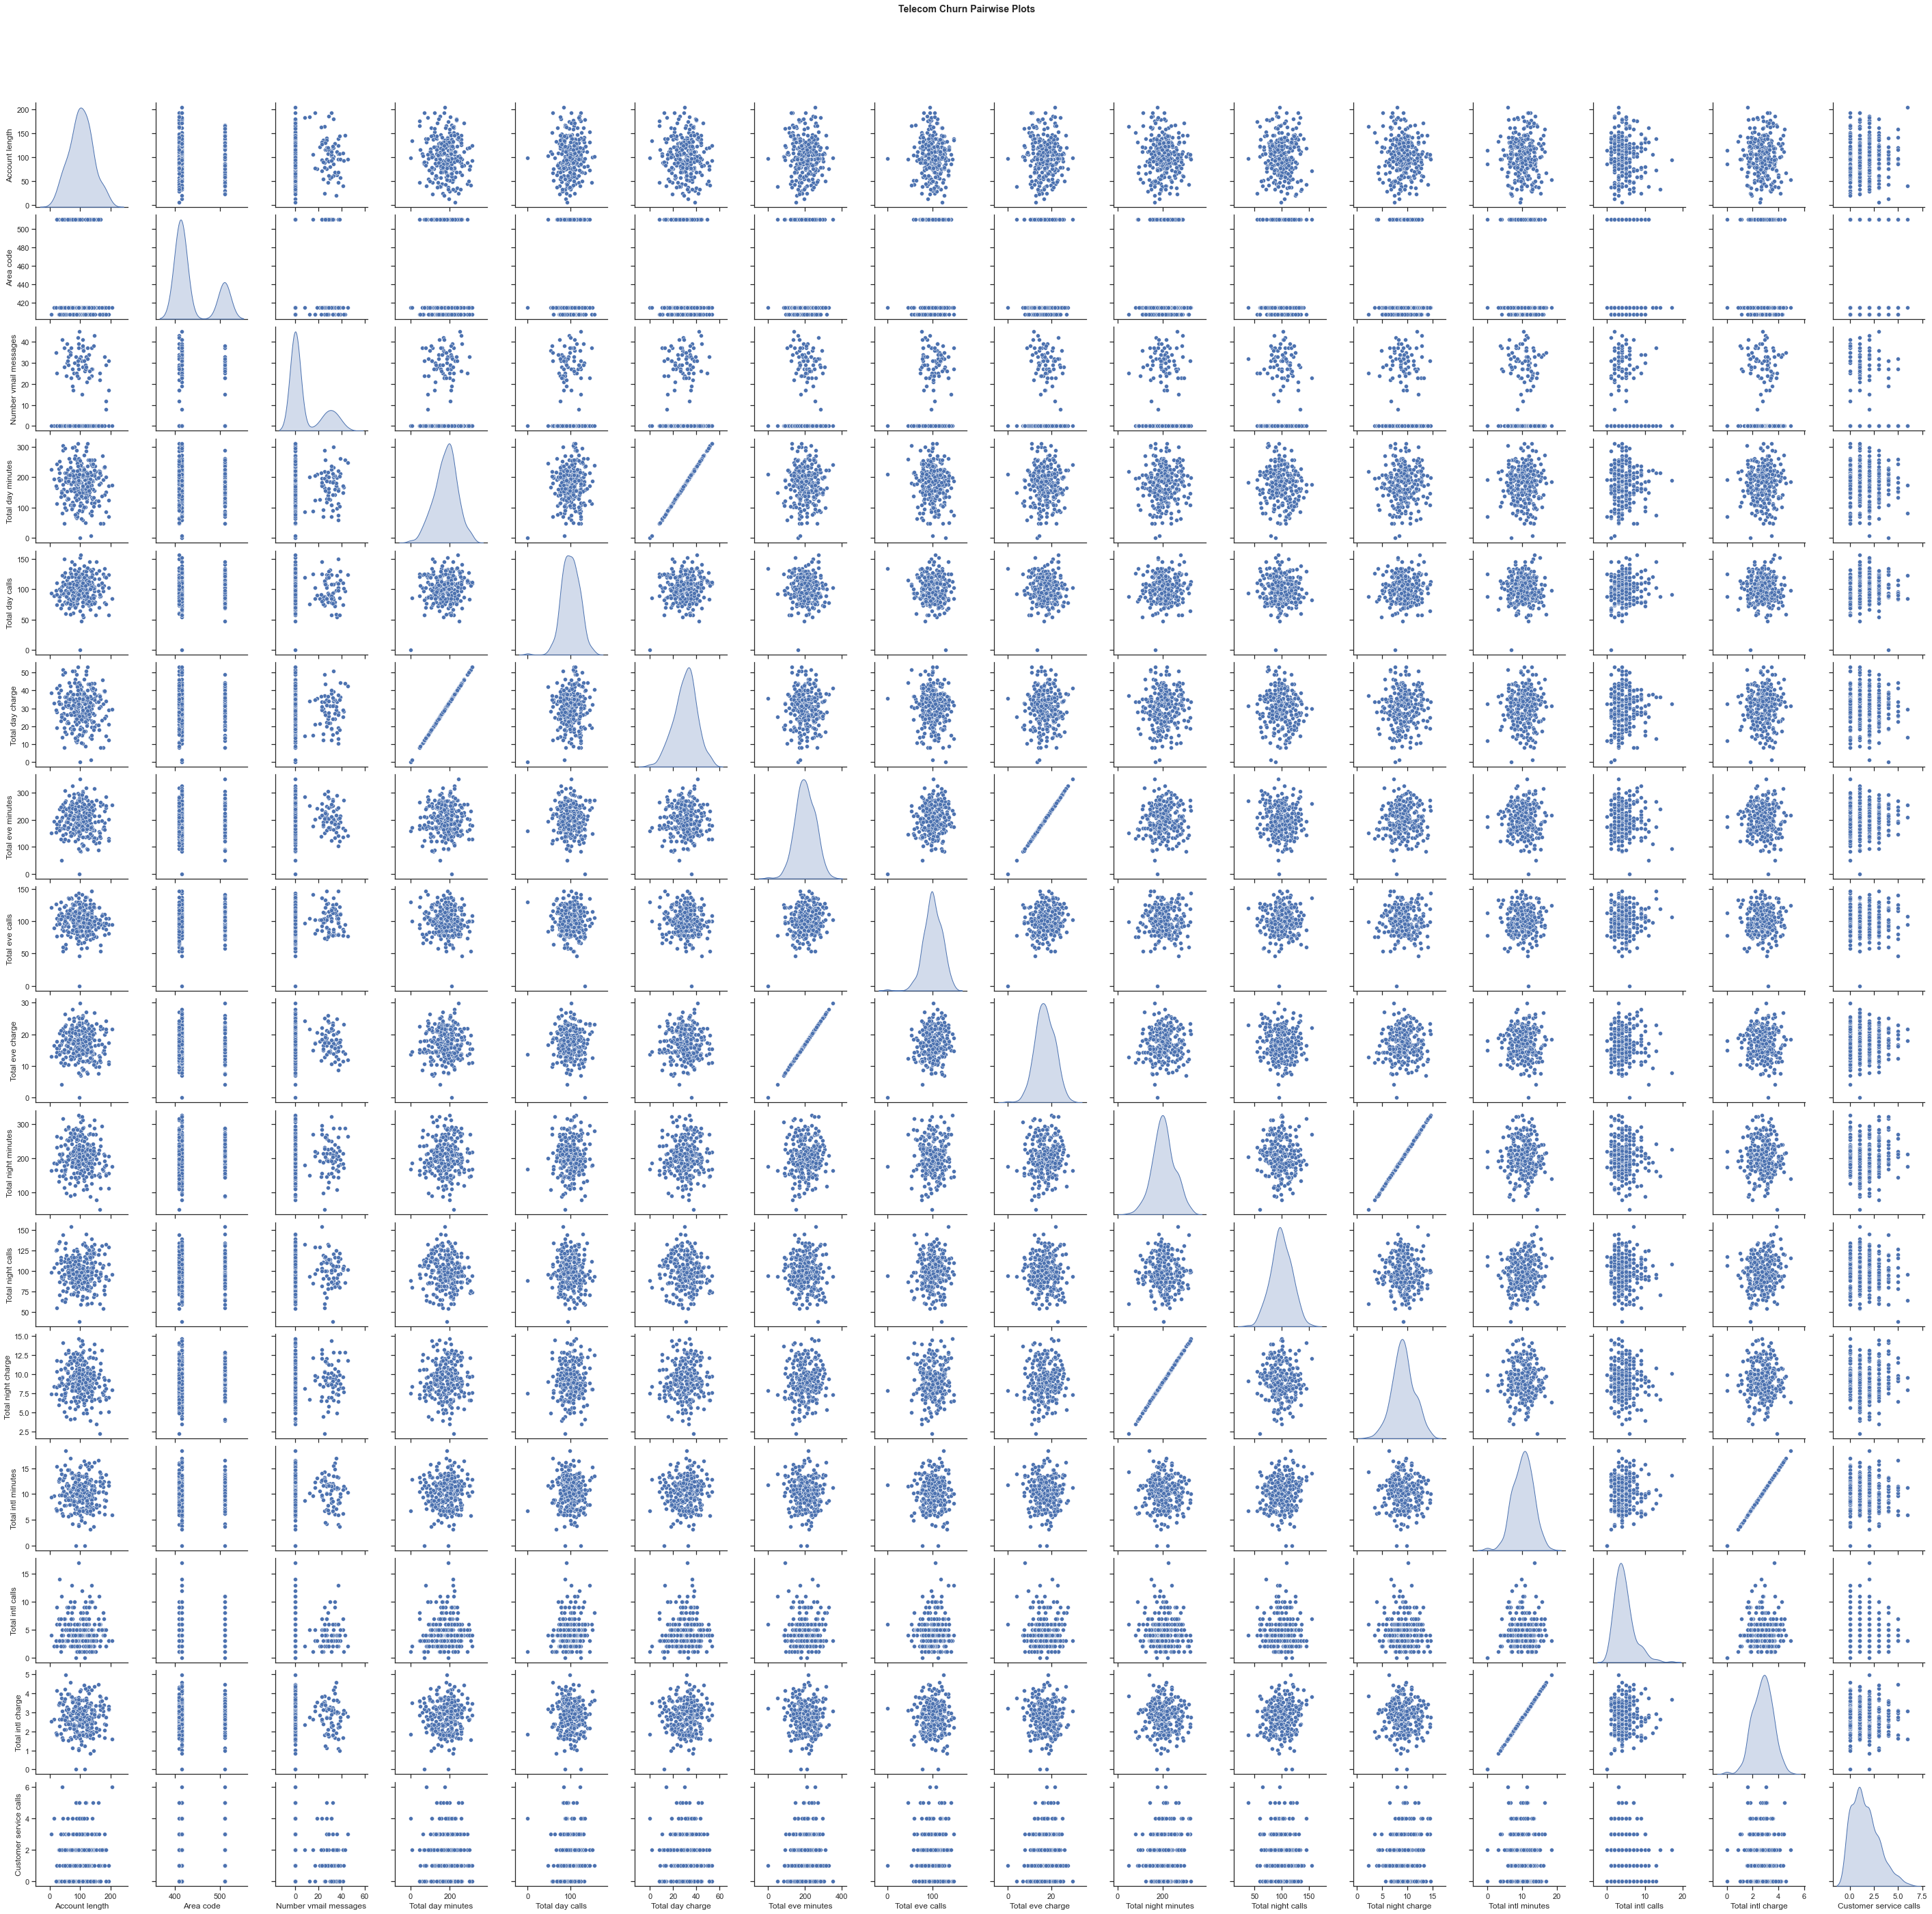

In [160]:
# Correlation and pair plot

import seaborn as sns
sns.set(style="ticks")
cor = sns.pairplot(d_spam.toPandas(), diag_kind="kde")
pairplot = cor.fig
pairplot.subplots_adjust(top=0.93, wspace=0.3)
pairplot.suptitle('Telecom Churn Pairwise Plots', fontsize=14, fontweight='bold');

def get_data(data_frame, removeCols):
    data_frame= data_frame.drop(*removeCols) \
        .withColumn("Churn", when(data_frame["Churn"] == 'true', 1.0).otherwise(0.0)) \
        .withColumn('International plan', when(data_frame["International plan"] == 'Yes', 1.0).otherwise(0.0)) \
        .withColumn('Voice mail plan', when(data_frame["Voice mail plan"] == 'Yes', 1.0).otherwise(0.0))
    return data_frame

from pyspark.sql.functions import split, col, round, when

eliminate_Col = ['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

Telecom_train = get_data(Telecom_train, removeCols=eliminate_Col)
Telecom_test = get_data(Telecom_test, removeCols=eliminate_Col)



In [161]:
#final columns after removing
import pandas as pd
pd.DataFrame(Telecom_train.take(5), columns=Telecom_train.columns).transpose()

,0,1,2,3,4
Account length,128.0,107.0,137.0,84.0,75.0
International plan,0.0,0.0,0.0,1.0,1.0
Voice mail plan,1.0,1.0,0.0,0.0,0.0
Number vmail messages,25.0,26.0,0.0,0.0,0.0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110.0,123.0,114.0,71.0,113.0
Total eve minutes,197.4,195.5,121.2,61.9,148.3
Total eve calls,99.0,103.0,110.0,88.0,122.0
Total night minutes,244.7,254.4,162.6,196.9,186.9
Total night calls,91.0,103.0,104.0,89.0,121.0


In [162]:
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml import Pipeline
def get_dummy(data_frame, digital_Cols, labelCol):


    assemb= VectorAssembler(inputCols=digital_Cols, outputCol="features")
    indx = StringIndexer(inputCol=labelCol, outputCol='indexedLabel')
    feature_Indexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=2)
    pipeline= Pipeline(stages = [assemb] + [indx] + [feature_Indexer])

    model = pipeline.fit(data_frame)
    data = model.transform(data_frame)

    data = data.withColumn('label', col(labelCol))

    return data.select('features', 'label', 'indexedFeatures', 'indexedLabel')


In [163]:
d_stratified = Telecom_train.sampleBy('Churn', fractions={0: Telecom_train.select("Churn").where('Churn == 1').count()/
                                                          Telecom_train.select("Churn").where('Churn == 0').count(), 1: 1.0}, seed = 5323)

d_stratified.groupby('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  0.0|  388|
|  1.0|  388|
+-----+-----+



In [164]:
digital_Cols = d_stratified.columns
digital_Cols.remove("Churn")


In [165]:
d_vectrzd = get_dummy(Telecom_train, digital_Cols, "Churn")
d_vector_stratified = get_dummy(d_stratified, digital_Cols, "Churn")
data_test_vectorized = get_dummy(Telecom_test, digital_Cols, "Churn")
d_vector_stratified.show(2, False)


+------------------------------------------------------------------+-----+------------------------------------------------------------------+------------+
|features                                                          |label|indexedFeatures                                                   |indexedLabel|
+------------------------------------------------------------------+-----+------------------------------------------------------------------+------------+
|[118.0,1.0,0.0,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0.0]|0.0  |[118.0,1.0,0.0,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0.0]|0.0         |
|[73.0,0.0,0.0,0.0,224.4,90.0,159.5,88.0,192.8,74.0,13.0,2.0,1.0]  |0.0  |[73.0,0.0,0.0,0.0,224.4,90.0,159.5,88.0,192.8,74.0,13.0,2.0,1.0]  |0.0         |
+------------------------------------------------------------------+-----+------------------------------------------------------------------+------------+
only showing top 2 rows



In [179]:
# K-fold cross validation
def kfoldcrossvalidation(vect_train_data, vect_test_data, classifiers, p_Grid, numFolds, round_Level, seed):
    names = []
    underROC_train = []
    underROC_test = []
    f1_tr = []
    f1_tst = []
    wp_tr = []
    wp_tst = []
    wr_tr = []
    wr_tst = []
    acc_train = []
    acc_test = []

    binary_classifier = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="indexedLabel")

    f1sco = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1") 
    wei_precision = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedPrecision") 
    wei_recall = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedRecall") 
    acc = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy") 
    for name, clf in classifiers:
        cv = CrossValidator(estimator=clf, estimatorParamMaps=paramGrid, evaluator=f1sco, numFolds=numFolds, seed=seed, collectSubModels=True)
        cvModel = cv.fit(vect_train_data)  
        predict_train = cvModel.transform(vect_train_data)
        predict_test = cvModel.transform(vect_test_data)
        underROC_train.append(binary_classifier.evaluate(predict_train))
        underROC_test.append(binary_classifier.evaluate(predict_test))
        f1_tr.append(acc.evaluate(predict_train))
        f1_tst.append(acc.evaluate(predict_test))
        wp_tr.append(wei_precision.evaluate(predict_train))
        wp_tst.append(wei_precision.evaluate(predict_test))
        wr_tr.append(wei_recall.evaluate(predict_train))
        wr_tst.append(wei_recall.evaluate(predict_test))
        acc_train.append(acc.evaluate(predict_train))
        acc_test.append(acc.evaluate(predict_test))
        names.append(name)

    cv_Results = spark.createDataFrame(zip(names, underROC_train, underROC_test, acc_train, acc_test, f1_tr, f1_tst, wp_tr, wp_tst, wr_tr, wr_tst), 
                                       schema=['Classifier name', 'underROC_train', 'underROC_test', 'Acc_train', 'Accuracy_test', 'f1_train', 'f1_test', 'wPrecision_train', 'wPrecision_test', 'wRecall_train', 'wRecall_test'])
  
    for t in cv_Results.dtypes:
        if t[1] == 'double':
            cv_Results = cv_Results.withColumn(t[0], round(cv_Results[t[0]], round_Level))
  
    return cv_Results


In [180]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

p_Grid = ParamGridBuilder().build()
classifiers = []

classifiers.append(('LR', LogisticRegression(labelCol='indexedLabel', featuresCol='indexedFeatures')))
classifiers.append(('DT', DecisionTreeClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')))
classifiers.append(('RF', RandomForestClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')))

Telecom_Results = kfoldcrossvalidation(vect_train_data=data_vectorized, vect_test_data=data_test_vectorized, 
                                classifiers=classifiers, p_Grid=p_Grid, numFolds=5, round_Level=3, seed=123)

cv_Results_stratified_data = kfoldcrossvalidation(vect_train_data=data_vectorized_stratified, 
                                           vect_test_data=data_test_vectorized, classifiers=classifiers, 
                                           p_Grid=p_Grid, numFolds=5, round_Level=3, seed=123)





In [181]:
Telecom_Results.toPandas().set_index('Classifier name')

,underROC_train,underROC_test,Acc_train,Accuracy_test,f1_train,f1_test,wPrecision_train,wPrecision_test,wRecall_train,wRecall_test
Classifier name,,,,,,,,,,
LR,0.597,0.577,0.863,0.855,0.863,0.855,0.835,0.820,0.863,0.855
DT,0.841,0.818,0.948,0.945,0.948,0.945,0.948,0.945,0.948,0.945
RF,0.821,0.793,0.947,0.939,0.947,0.939,0.949,0.940,0.947,0.939
